In [84]:
import pandas as pd
import numpy as np
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [156]:
data= pd.read_csv('train_indessa.csv')

In [157]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [87]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [158]:
features = data.columns
features

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

### check for missing values 

#lets start with deviding it into cat and numerical variables 

#categorical variables

In [159]:
var_cat = []
for var in features:
    if data[var].dtypes == 'O':
        var_cat.append(var)
print(var_cat)

#print % of missing values 
(data[var_cat].isnull().mean()*100)


['term', 'batch_enrolled', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'verification_status_joint', 'last_week_pay']


term                          0.000000
batch_enrolled               15.992585
grade                         0.000000
sub_grade                     0.000000
emp_title                     5.791018
emp_length                    5.050636
home_ownership                0.000000
verification_status           0.000000
pymnt_plan                    0.000000
desc                         85.801085
purpose                       0.000000
title                         0.016904
zip_code                      0.000000
addr_state                    0.000000
initial_list_status           0.000000
application_type              0.000000
verification_status_joint    99.942715
last_week_pay                 0.000000
dtype: float64

In [90]:
var_num = [] 
for var in features: 
    if data[var].dtypes != 'O': 
        var_num.append(var) 
print(var_num)

data[var_num].isnull().mean()*100

['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']


member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
int_rate                        0.000000
annual_inc                      0.000563
dti                             0.000000
delinq_2yrs                     0.003005
inq_last_6mths                  0.003005
mths_since_last_delinq         51.190771
mths_since_last_record         84.575755
open_acc                        0.003005
pub_rec                         0.003005
revol_bal                       0.000000
revol_util                      0.053904
total_acc                       0.003005
total_rec_int                   0.000000
total_rec_late_fee              0.000000
recoveries                      0.000000
collection_recovery_fee         0.000000
collections_12_mths_ex_med      0.017843
mths_since_last_major_derog    75.023853
acc_now_delinq                  0.003005
tot_coll_amt                    7.889142
tot_cur_bal     

In [91]:
print(data.shape)
print(data[var_cat].shape)
data[var_num].shape

(532428, 45)
(532428, 18)


(532428, 27)

#### adress columns with more than 50% missing data
#for colum desc, mths_since_last_record, mths_since_last_major_derog, verification_status_joint,mths_since_last_delinq  
#significant amount of data is missing 
#for desc column almost 90% of data is missing 
#still check if remaining data gives any significant discovery 
#create new column to covert missing and non missing as true and false 


In [92]:
data['x']= data['desc'].isna()
data['once']=1
data['y']= data['mths_since_last_record'].isna()
data['z']= data['mths_since_last_major_derog'].isna()
data['x1']= data['verification_status_joint'].isna()
data['y1']= data['mths_since_last_delinq'].isna()

[Text(0.5, 0, 'mths_since_last_delinq')]

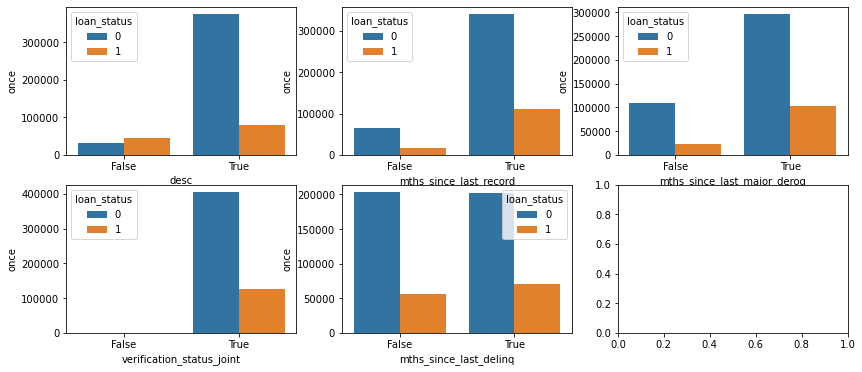

In [10]:
#check the graph of data missing , for loan status 
fig, axs = plt.subplots(ncols=3,nrows=2 ,figsize=(14, 6))
ax1= sn.barplot(x=data['x'],y=data['once'], hue=data['loan_status'], estimator=np.sum, ax=axs[0][0])
ax1.set(xlabel='desc')
ax2= sn.barplot(x=data['y'],y=data['once'], hue=data['loan_status'], estimator=np.sum, ax=axs[0][1] )
ax2.set(xlabel='mths_since_last_record')
ax3= sn.barplot(x=data['z'],y=data['once'], hue=data['loan_status'], estimator=np.sum, ax=axs[0][2])
ax3.set(xlabel='mths_since_last_major_derog')
ax4= sn.barplot(x=data['x1'],y=data['once'], hue=data['loan_status'], estimator=np.sum,ax=axs[1][0])
ax4.set(xlabel='verification_status_joint')
ax5= sn.barplot(x=data['y1'],y=data['once'], hue=data['loan_status'], estimator=np.sum,ax=axs[1][1])
ax5.set(xlabel='mths_since_last_delinq')

#we are having lot of fraud lables for missing values 

#so given data is not giving much information

#if non missing values for these columns would have given any sigificant sign of fraudness ,
#it would have been good idea to take these columns for model training 

#above columns can be dropped 

#for mths_since_last_deling , 50% data is missing , if domain expert suggests to keep it , imputation can be done 

#member id is having really high cardinality , and wont be giving much insights , hence can be dropped 


In [93]:
data.drop(['desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint', 'mths_since_last_delinq'
                         , 'x', 'y', 'z', 'x1','y1', 'member_id'], axis=1, inplace=True)

##lets concentrate on variables with 5 to 20% missing values 

#batch_enrolled has 15% missing values 

In [17]:
data['batch_enrolled'].unique().shape
data['batch_enrolled'].unique().shape

(105,)

In [13]:
# it has 105 unique values 
#check distribution : just to check distribution , will fill na with 0 

In [14]:
data['x2']= data['batch_enrolled'].fillna('0')
data['x2'].isna().sum()

0

<AxesSubplot:xlabel='x2', ylabel='Count'>

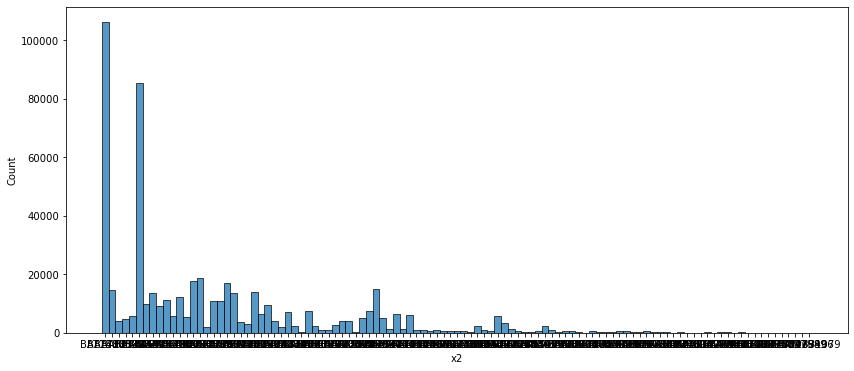

In [16]:
#%matplotlib
import plotly
fig, axs = plt.subplots(figsize=(14, 6))
sn.histplot(data['x2'],bins=50)

#### apart from nan values there is empty string values as well in batch enrolled 

#check number of values in empty string 

In [15]:
data['x2'].replace(to_replace=' ', value='0',inplace=True)
print('data missing for column batch enrolled is :',(data['x2'][data['x2']=='0'].count())/(len(data['x2']))*100,'%')

data missing for column batch enrolled is : 35.916217779681006 %


#### it has 35% missing data , I am dropping it 

#data can be handelled 

#This can be handlled by running separate classificatio model only on  independent parametrs , 

#values can be predicted for missing values 

### missing data handelling for emp_title and emp_length 

In [16]:
data['emp_title'].unique().shape

(190125,)

-it has really high cardinality 

- count frequncy encoding would be good way to encode it 

- missing values can be handled by random imputation 

In [4]:
data['emp_length'].unique().shape

(12,)

number of nan values: 0


[Text(0.5, 0, 'emp_length')]

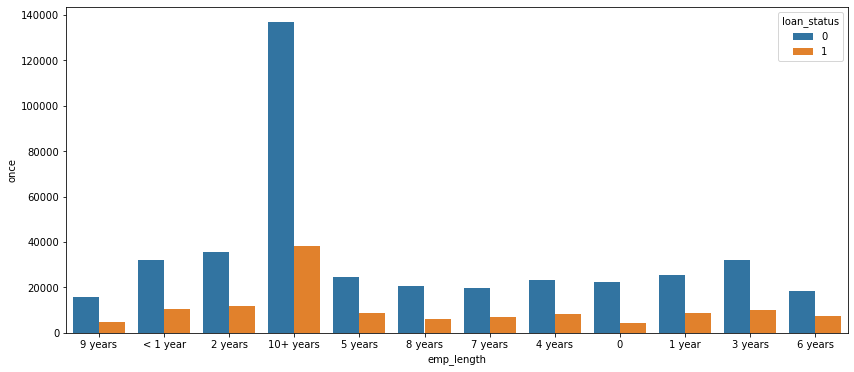

In [10]:
#check the distribution of data for emp_length 

data['x3']= data['emp_length'].fillna(0)
print('number of nan values:',  data['x3'].isna().sum())

fig, axs = plt.subplots(figsize=(14, 6))
ax7= sn.barplot(x=data['x3'],y=data['once'], hue=data['loan_status'], estimator=np.sum)
ax7.set(xlabel='emp_length')

#employees with more than 10 years experience are max in number , data is left skewed 

#lable encoding can be done 

#random imputation can be used to replce missing values 

#other methods can also be tried , give time constrainst not trying it 


#### check for column 'title'

In [12]:
data['title'].unique().shape

(39694,)

In [14]:
data['title'].isna().sum()

90

##### as this is text data , separate sentiment detection model can be run to identify sentiment

#compare to 5 lac total data , only 90 are missing , 

## check for numeric data 

#first check for corelation matrix 
#even if multicolinearity doesnt effect much in decision based trees , as a good practice I am removing it

In [94]:
tobe_removed= ['mths_since_last_delinq', 'member_id', 'mths_since_last_major_derog', 'mths_since_last_record']
for ele in tobe_removed:
    var_num.remove(ele)
corr= data[var_num].corr()
corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
loan_amnt,1.000000,0.999276,0.997124,0.145037,0.330655,0.041866,-0.000454,-0.033693,0.197630,-0.080952,...,0.532580,0.031374,0.073326,0.052995,-0.014822,0.003196,-0.019994,0.327957,0.307989,-0.095713
funded_amnt,0.999276,1.000000,0.998041,0.145222,0.330493,0.042699,-0.000171,-0.034298,0.198078,-0.080613,...,0.531616,0.031022,0.072895,0.052797,-0.014663,0.003298,-0.019994,0.327955,0.307988,-0.097563
funded_amnt_inv,0.997124,0.998041,1.000000,0.145251,0.329495,0.044952,0.000280,-0.038378,0.198672,-0.079552,...,0.529116,0.027770,0.071242,0.050261,-0.014240,0.003473,-0.019995,0.327981,0.308022,-0.101877
int_rate,0.145037,0.145222,0.145251,1.000000,-0.072061,0.163206,0.056767,0.228596,-0.009115,0.052291,...,0.445634,0.056141,0.107292,0.071187,0.013924,0.026984,0.002744,-0.091506,-0.164408,0.002590
annual_inc,0.330655,0.330493,0.329495,-0.072061,1.000000,-0.175867,0.047873,0.033426,0.134948,-0.007829,...,0.127483,0.013254,0.007190,0.006332,-0.003960,0.014906,0.000196,0.416120,0.265846,-0.008596
dti,0.041866,0.042699,0.044952,0.163206,-0.175867,1.000000,-0.007164,-0.016029,0.297186,-0.045428,...,0.018475,-0.011336,0.002544,0.003708,0.001032,0.007267,-0.016416,-0.014336,0.067941,-0.134020
delinq_2yrs,-0.000454,-0.000171,0.000280,0.056767,0.047873,-0.007164,1.000000,0.021701,0.052561,-0.010797,...,0.002810,0.017519,-0.000473,0.000011,0.063426,0.133391,0.001720,0.065782,-0.040001,-0.045717
inq_last_6mths,-0.033693,-0.034298,-0.038378,0.228596,0.033426,-0.016029,0.021701,1.000000,0.112357,0.056244,...,0.087688,0.033678,0.045276,0.033264,0.007005,-0.003681,0.013787,0.033267,0.006220,0.087339
open_acc,0.197630,0.198078,0.198672,-0.009115,0.134948,0.297186,0.052561,0.112357,1.000000,-0.024764,...,0.062011,-0.009947,0.000874,0.002537,0.010917,0.017665,0.003453,0.243723,0.319794,-0.065048
pub_rec,-0.080952,-0.080613,-0.079552,0.052291,-0.007829,-0.045428,-0.010797,0.056244,-0.024764,1.000000,...,-0.060336,-0.011130,-0.013688,-0.007849,0.021157,0.001331,0.036327,-0.074634,-0.099084,-0.048884


<AxesSubplot:>

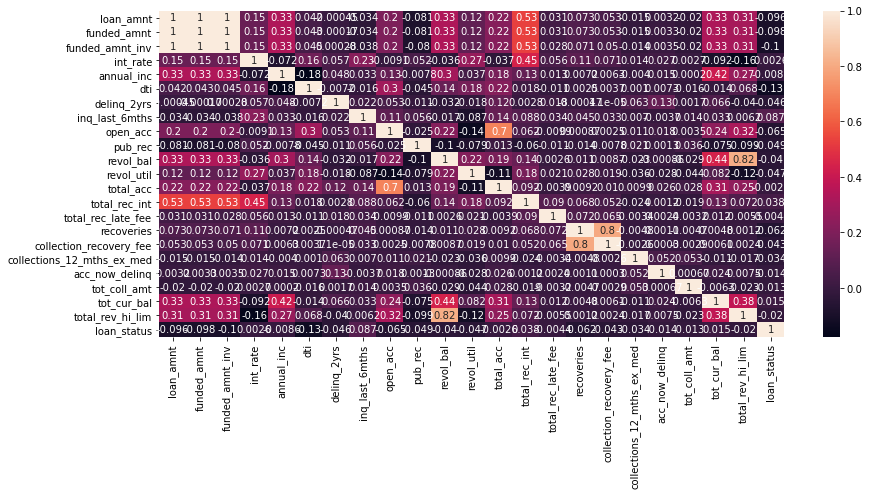

In [125]:
fig, axs = plt.subplots(figsize=(14, 6))
sn.heatmap(data=corr,annot=True)

#High correlation between revo_balance and total_rev_hi_lim = 0.82, one column can be removed 

#High correlation between open_acc and total_acc , 0.7 , one column can be removed 

#High corelation between, collection_recovery_fee and total_rec_late_fee , one can be removed 

####  as specifically mentioned about loan funden amount by investors , lets check if there is any data discovery 


In [112]:
N=[]
j=0
for i in range(len(data)):
    if data.iloc[:,j][i]!=data.iloc[:,j+1][i] and data.iloc[:,j+1][i]!=data.iloc[:,j+2][i] :
        X= [data.iloc[:,j][i], data.iloc[:,j+1][i], data.iloc[:,j+2][i] ]
        N.append(X)

In [166]:
N1= pd.DataFrame(N, columns=('loan_amnt', 'funded_amnt', 'funded_amnt_inv'))
N1

,loan_amnt,funded_amnt,funded_amnt_inv
0,25000,17275,17250.000000
1,34200,24800,24775.000000
2,3000,1500,1439.964757
3,15000,9150,8685.090429
4,21000,13500,12567.187303
...,...,...,...
1010,24000,16450,16425.000000
1011,35000,27050,16300.000000
1012,16000,11325,11200.000000
1013,20000,12425,11600.000000


##### only 1015 times there was difference of sanctioned amt by investors to initial amt 

#check how much was max differance 

In [121]:
N1['diff_int_sanction']= N1.iloc[:,0]-N1.iloc[:,1]
N1['dif_ini_by_inv']= N1.iloc[:,0]-N1.iloc[:,2]

In [122]:
N1

,0,1,2,diff_int_sanction,dif_ini_by_inv
0,25000,17275,17250.000000,7725,7750.000000
1,34200,24800,24775.000000,9400,9425.000000
2,3000,1500,1439.964757,1500,1560.035243
3,15000,9150,8685.090429,5850,6314.909571
4,21000,13500,12567.187303,7500,8432.812697
...,...,...,...,...,...
1010,24000,16450,16425.000000,7550,7575.000000
1011,35000,27050,16300.000000,7950,18700.000000
1012,16000,11325,11200.000000,4675,4800.000000
1013,20000,12425,11600.000000,7575,8400.000000


In [123]:
#diff between initial and sanctioned 
print('diff between initial and sanctioned is :', N1['diff_int_sanction'].max())

#diff between initial and sanctioned by inv 
print('diff between initial and sanctioned by inv is :', N1['dif_ini_by_inv'].max())

diff between initial and sanctioned is : 21150
diff between initial and sanctioned by inv is : 24200.0


#one column can be taken as it is 

#one more column can be encoded as values for difference=yes and No , 0 or 1 

#for lack of time I am removing these two columns 

#### for following columns same number of data is missing 
-tot_coll_amt, tot_cur_bal, total_rev_hi_lim  7.889142%

-lets assume data is missing completely at random 

-we can replace it with mean , obviously it can not be the final solution 

### for columns .... really less number of data is missing , so records can be dropped or can be replaced with mean 
-annual_inc                      0.000563

-delinq_2yrs                     0.003005

-inq_last_6mths                  0.003005

-open_acc                        0.003005

-pub_rec                         0.003005

-revol_util                      0.053904

-total_acc                       0.003005

-collections_12_mths_ex_med      0.017843

-acc_now_delinq                  0.003005

#### lets replace with mean 

### lets now check for cardinality of all categorical features for encoding

In [160]:
for i in var_cat:
    print(i, data[i].unique().shape)

term (2,)
batch_enrolled (105,)
grade (7,)
sub_grade (35,)
emp_title (190125,)
emp_length (12,)
home_ownership (6,)
verification_status (3,)
pymnt_plan (2,)
desc (70639,)
purpose (14,)
title (39694,)
zip_code (917,)
addr_state (51,)
initial_list_status (2,)
application_type (2,)
verification_status_joint (4,)
last_week_pay (98,)


#lets do lable encoding for less unique values 

#emp_title we will do count or frequncy encoding

#for title separate text detection model is needed 

#for subgrade only values from 1 to 9 are enough 

#desc column can be dropped 

#week also can be taken as numeric value for week 

#for zip code and addre_state we can do target or count frequency encoding 


### columns to be dropped are 'desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint', 'mths_since_last_delinq','batch_enrolled' 



In [169]:
columns_to_drop =['desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint', 'mths_since_last_delinq','batch_enrolled' ]

### check for imbalance in the lables 

In [170]:
data.groupby('loan_status').count()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_status,,,,,,,,,,,,,,,,,,,,,
0,406601,406601,406601,406601,406601,341577,406601,406601,406601,382162,...,406601,406578,109757,406601,304,406601,406598,397921,397921,397921
1,125827,125827,125827,125827,125827,105702,125827,125827,125827,119433,...,125827,125755,23223,125827,1,125827,125814,92503,92503,92503


##### data is not imbalanced 

In [ ]:
data['']